In [3]:
from crpapi import CRP
from ed.API_keys import get_opensecrets_key

crp=CRP(get_opensecrets_key()) #makes a CRP object

object_methods = [method_name for method_name in dir(crp) if callable(getattr(crp, method_name))]
print(dir(crp))

['BASE_URI', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'apikey', 'candidates', 'committees', 'fetch', 'http', 'indexp', 'orgs']


In [5]:
# tricky part: getting the name right
name = 'Lockheed Martin'

orgid = crp.orgs.get('Lockheed Martin')['@attributes']['orgid'] #searches for organizations with 'Microsoft' in their name

In [12]:
## Import what you'll need here
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import os
import ast

import matplotlib.pyplot as plt
import numpy as np

os.environ['MOZ_HEADLESS'] = '1' # prevents browser from popping up
dr = webdriver.Firefox()
dr.get("https://www.opensecrets.org/federal-lobbying/clients/summary?id=" + str(orgid))
soup = BeautifulSoup(dr.page_source,
 'html.parser')
result = soup.find_all('div')
data = result[36].find_all('div', attrs = {'class' : "FusionChart"})[0]['data-source']
data = ast.literal_eval(data)

years = data['categories'][0]['category']
q_dict = {}
q_dict['q1'] = data['dataset'][0]['dataset'][2]['data']
q_dict['q2'] = data['dataset'][0]['dataset'][3]['data']
q_dict['q3'] = data['dataset'][0]['dataset'][4]['data']
q_dict['q4'] = data['dataset'][0]['dataset'][5]['data']
num_lobbyists = data['lineset'][0]['data']

26
26
26
26
26
26
26
26


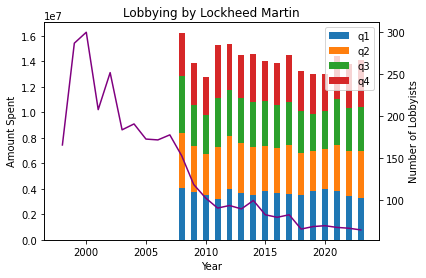

In [25]:
years_proc = [int(year['label']) for year in years]
quarterly_counts = {}
for key in ["q1", "q2", "q3", "q4"]:
    quarterly_counts[key] = []
    quarterly_counts[key] = [q_dict[key][idx]['value'] for idx in range(len(years_proc))]
    for idx in range(len(years_proc)):
        if quarterly_counts[key][idx] == '':
            quarterly_counts[key][idx] = 0
        else:
            continue
num_lobbyists_proc = [int(lobbyist['value']) for lobbyist in num_lobbyists]

# weight_counts = {
#     "q1": [q1_values['value'] for q1_values in q1_values],
#     "q2": [q2_values['value'] for q2_values in q2_values],
#     "q3": [q3_values['value'] for q3_values in q3_values],
#     "q4": [q4_values['value'] for q4_values in q4_values],
# }
width = 0.5

# two subplots
fig, ax = plt.subplots()
bottom = np.zeros(26)

for boolean, quarterly_count in quarterly_counts.items():
    print(len(quarterly_count))
    print(len(years_proc))
    p = ax.bar(years_proc, quarterly_count, width, label=boolean, bottom=bottom)
    bottom += quarterly_count

ax.set_title("Lobbying by Lockheed Martin")
ax.legend(loc="upper right")
ax.set_ylabel("Amount Spent")
ax.set_xlabel("Year")

ax2 = ax.twinx()
ax2.plot(years_proc, num_lobbyists_proc, color='purple')
ax2.set_ylabel("Number of Lobbyists")

plt.show()


'{"chart":{"xaxisname":"Year","yaxisname":"Total Lobbying Spending","syaxisname":"Number of Lobbyists","numberprefix":"$","setadaptivesymin":"1","bgColor":"#ffffff","showBorder":"0","showCanvasBorder":"0","showAlternateHgridColor":"0","usePlotGradientcolor":"0","showvalues":0,"formatnumberscale":1,"divlinedashed":1,"showplotborder":0,"legendBorderColor":"ffffff","legendShadow":0,"numberScaleValue":"1000,1000,1000","numberScaleUnit":"K,M,B","basefont":"Arial","labelDisplay":"rotate","exportEnabled":"1"},"categories":[{"category":[{"label":"1998"},{"label":"1999"},{"label":"2000"},{"label":"2001"},{"label":"2002"},{"label":"2003"},{"label":"2004"},{"label":"2005"},{"label":"2006"},{"label":"2007"},{"label":"2008"},{"label":"2009"},{"label":"2010"},{"label":"2011"},{"label":"2012"},{"label":"2013"},{"label":"2014"},{"label":"2015"},{"label":"2016"},{"label":"2017"},{"label":"2018"},{"label":"2019"},{"label":"2020"},{"label":"2021"},{"label":"2022"},{"label":"2023"}]}],"dataset":[{"dataset